In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Importation de notre Dataframe
df= pd.read_csv('water_potability.csv')

In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

1. pH value: (Valeur du PH)
- Le pH est un paramètre important dans l'évaluation de l'équilibre acido-basique de l'eau. Il est également l'indicateur de l'état acide ou alcalin de l'eau. L'OMS a recommandé une limite maximale admissible de pH comprise entre 6,5 et 8,5. Les résultats de l'étude actuelle sont compris entre 6,52 et 6,83, ce qui correspond aux normes de l'OMS.

2. Hardness: (Dureté)
- La dureté est principalement due aux sels de calcium et de magnésium. Ces sels sont dissous dans les dépôts géologiques traversés par l'eau. La durée pendant laquelle l'eau est en contact avec des matériaux produisant de la dureté permet de déterminer la quantité de dureté présente dans l'eau brute. À l'origine, la dureté était définie comme la capacité de l'eau à précipiter le savon causé par le calcium et le magnésium.

3. Solids (Total dissolved solids - TDS): Solides (Total des solides dissous - TDS)
- L'eau a la capacité de dissoudre un large éventail de minéraux ou de sels inorganiques et organiques tels que le potassium, le calcium, le sodium, les bicarbonates, les chlorures, le magnésium, les sulfates, etc. Ces minéraux produisent un goût indésirable et une couleur diluée dans l'apparence de l'eau. Il s'agit d'un paramètre important pour l'utilisation de l'eau. Une eau dont la valeur de TDS est élevée indique qu'elle est fortement minéralisée. La limite souhaitable pour le TDS est de 500 mg/l et la limite maximale de 1000 mg/l qui est prescrite pour la consommation.

4. Chloramines:
- Le chlore et la chloramine sont les principaux désinfectants utilisés dans les réseaux d'eau publics. Les chloramines se forment le plus souvent lorsque de l'ammoniac est ajouté au chlore pour traiter l'eau potable. Des niveaux de chlore allant jusqu'à 4 milligrammes par litre (mg/L ou 4 parties par million (ppm)) sont considérés comme sûrs dans l'eau potable.

5. Sulfate:
- Les sulfates sont des substances naturelles que l'on trouve dans les minéraux, le sol et les roches. Ils sont présents dans l'air ambiant, les eaux souterraines, les plantes et les aliments. La principale utilisation commerciale des sulfates est l'industrie chimique. La concentration de sulfate dans l'eau de mer est d'environ 2 700 milligrammes par litre (mg/L). Elle est comprise entre 3 et 30 mg/L dans la plupart des réserves d'eau douce, bien que des concentrations beaucoup plus élevées (1 000 mg/L) soient observées dans certaines zones géographiques.

6. Conductivity: (Conductivité)
- L'eau pure n'est pas un bon conducteur de courant électrique mais plutôt un bon isolant. L'augmentation de la concentration en ions augmente la conductivité électrique de l'eau. En général, la quantité de solides dissous dans l'eau détermine la conductivité électrique. La conductivité électrique (CE) mesure en fait le processus ionique d'une solution qui lui permet de transmettre le courant. Selon les normes de l'OMS, la valeur de la CE ne doit pas dépasser 400 μS/cm.

7. Organic_carbon: (Carbone organique)
- Le carbone organique total (COT) dans les sources d'eau provient de la décomposition de la matière organique naturelle (MON) ainsi que de sources synthétiques. Le COT est une mesure de la quantité totale de carbone dans les composés organiques de l'eau pure. Selon l'US EPA, le COT doit être inférieur à 2 mg/l dans l'eau traitée/ potable et inférieur à 4 mg/l dans les sources d'eau utilisées pour le traitement.

8. Trihalomethanes:
- Les THM sont des substances chimiques que l'on peut trouver dans l'eau traitée au chlore. La concentration de THM dans l'eau potable varie en fonction du niveau de matière organique dans l'eau, de la quantité de chlore nécessaire pour traiter l'eau et de la température de l'eau traitée. Des niveaux de THM allant jusqu'à 80 ppm sont considérés comme sûrs dans l'eau potable.

9. Turbidity: (Turbidité)
- La turbidité de l'eau dépend de la quantité de matière solide présente à l'état de suspension. Il s'agit d'une mesure des propriétés d'émission de lumière de l'eau et le test est utilisé pour indiquer la qualité des rejets de déchets en ce qui concerne les matières colloïdales. La valeur moyenne de turbidité obtenue pour Wondo Genet Campus (0,98 NTU) est inférieure à la valeur recommandée par l'OMS de 5,00 NTU.

10. Potability: (Potabilité)
- Indique si l'eau est propre à la consommation humaine, 1 signifiant « potable » et 0 signifiant « non potable ».

In [4]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
df.shape
print("Numbre de lignes:", df.shape[0])
print("Numbre de colonnes:", df.shape[1])

Numbre de lignes: 3276
Numbre de colonnes: 10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#Le résumé statique de notre DF
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

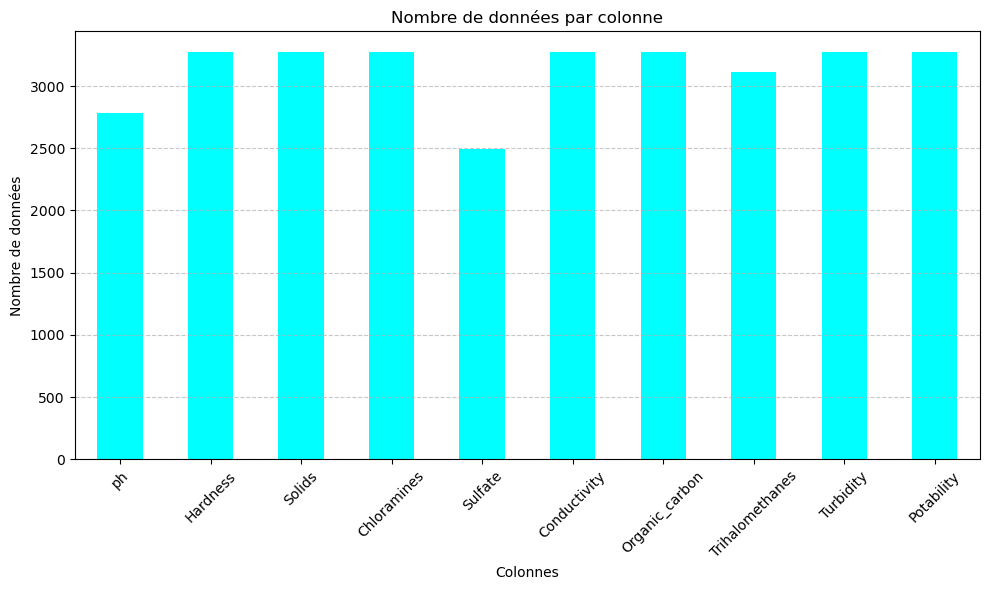

In [8]:
# Affichage des données de notre df sous forme de graphique 
data_counts = df.count()

# Creation d'un graphique à barres
plt.figure(figsize=(10, 6))
data_counts.plot(kind='bar', color='cyan')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de données')
plt.title('Nombre de données par colonne')
plt.xticks(rotation=45)  # Rotation des étiquettes d'axe X pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille pour faciliter la lecture
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter les chevauchements
plt.show()

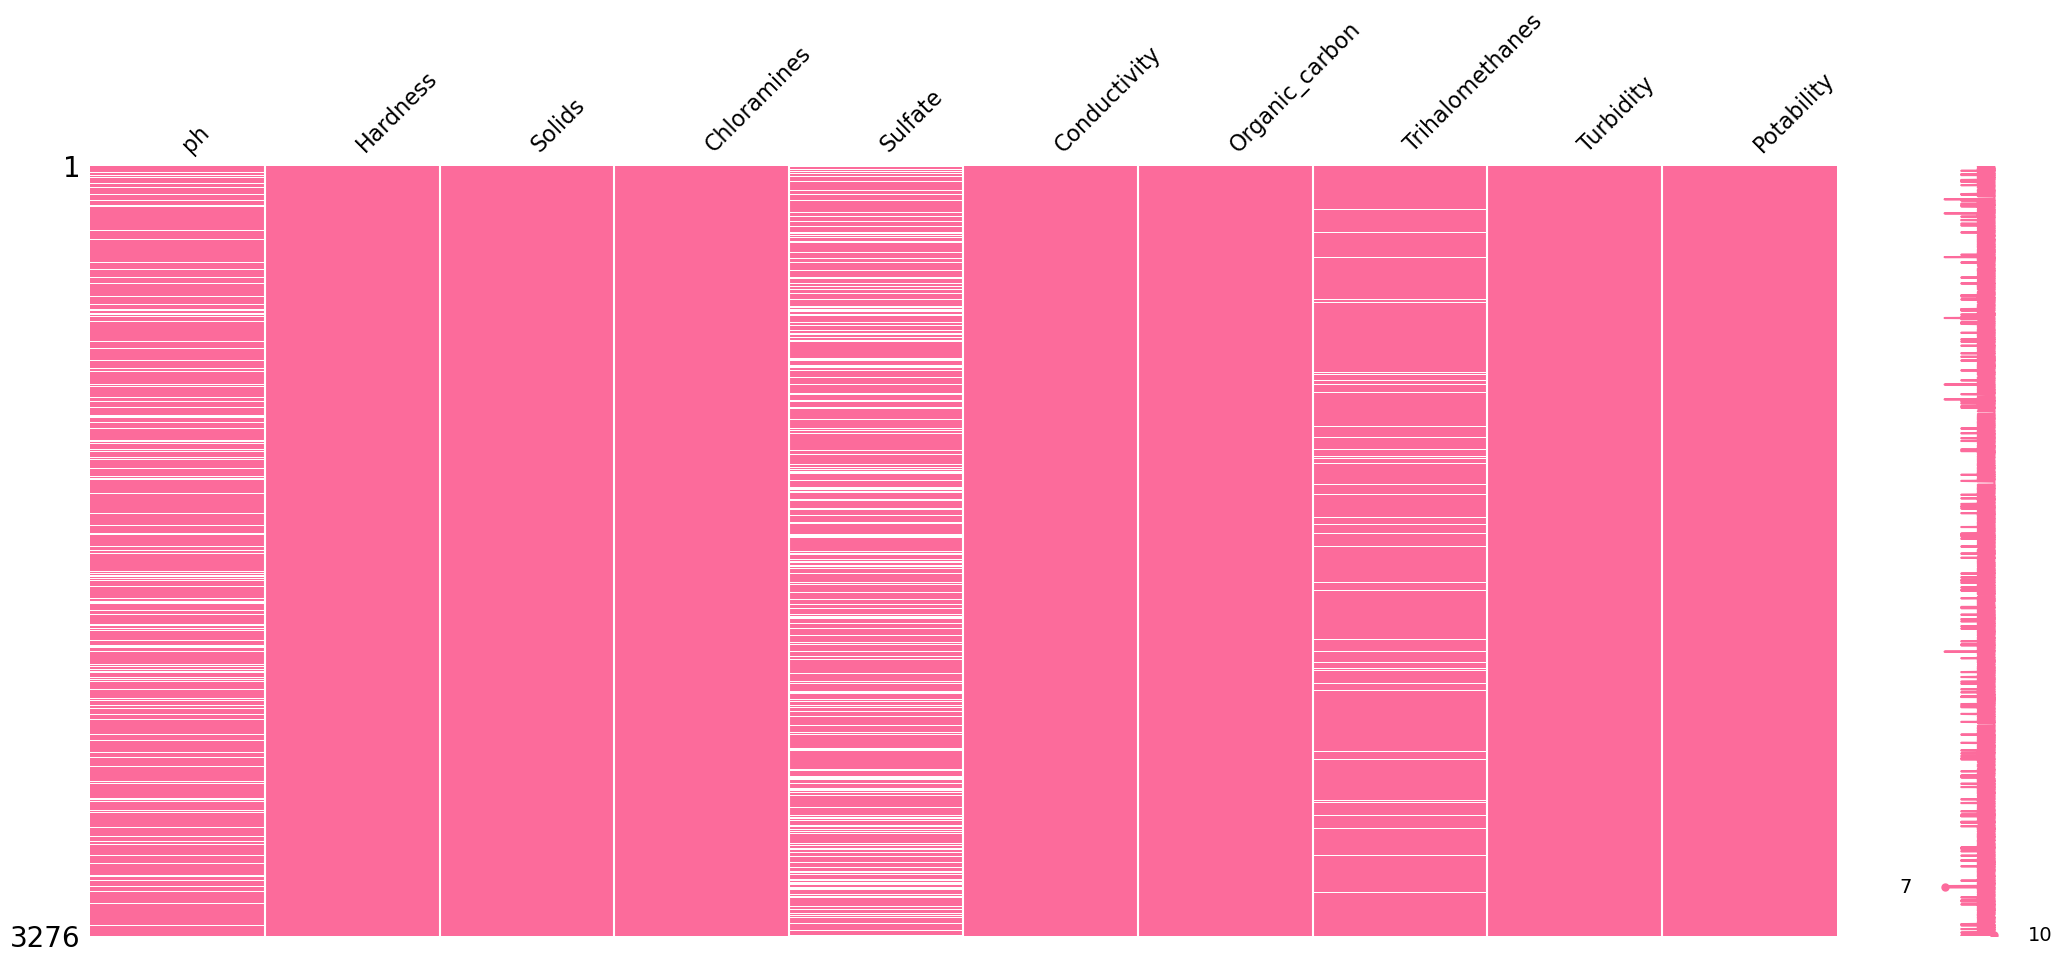

In [9]:
fig = msno.matrix(df,color=(0.99,0.42,0.61))

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Supression des lignes avec des valeurs manquantes dans toutes les colonnes
df_nettoye = df.dropna()

df_nettoye.to_csv("df_nettoye.csv")

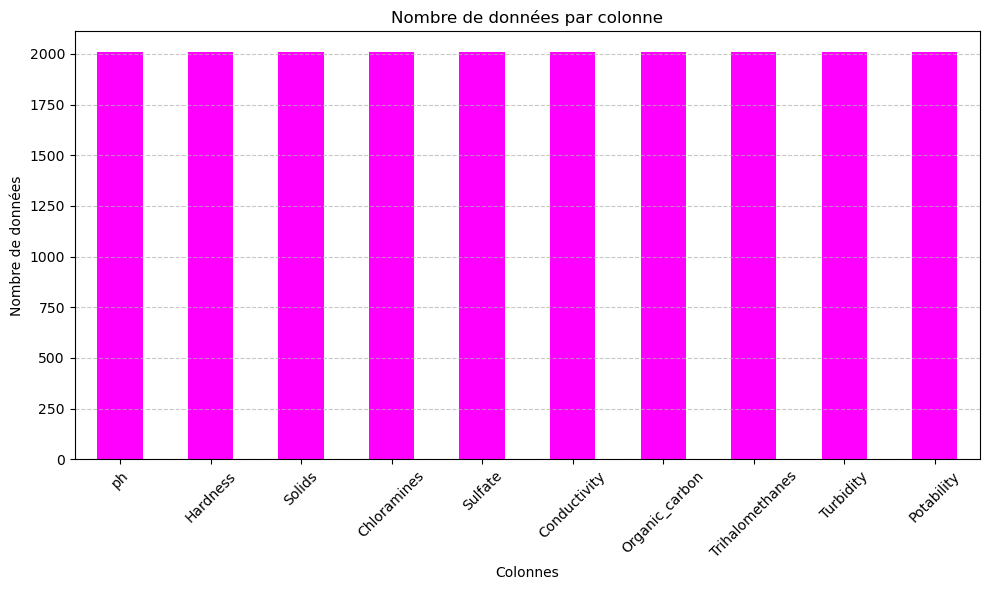

In [12]:
# Affichage des données de notre df sous forme de graphique 
data_counts = df_nettoye.count()

# Creation d'un graphique à barres
plt.figure(figsize=(10, 6))
data_counts.plot(kind='bar', color='magenta')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de données')
plt.title('Nombre de données par colonne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
df_nettoye.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [14]:
df_nettoye.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

In [15]:
X= df_nettoye.drop("Potability", axis=1)
y = df_nettoye["Potability"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}
# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

In [16]:
accuracy

0.5732009925558312

Corrélations entre les variables :
                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.108948 -0.087615    -0.024768  0.010524   
Hardness         0.108948  1.000000 -0.053269    -0.022685 -0.108521   
Solids          -0.087615 -0.053269  1.000000    -0.051789 -0.162769   
Chloramines     -0.024768 -0.022685 -0.051789     1.000000  0.006254   
Sulfate          0.010524 -0.108521 -0.162769     0.006254  1.000000   
Conductivity     0.014128  0.011731 -0.005198    -0.028277 -0.016192   
Organic_carbon   0.028375  0.013224 -0.005484    -0.023808  0.026776   
Trihalomethanes  0.018278 -0.015400 -0.015668     0.014990 -0.023347   
Turbidity       -0.035849 -0.034831  0.019409     0.013137 -0.009934   
Potability       0.014530 -0.001505  0.040674     0.020784 -0.015303   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.014128        0.028375         0.018278  -0.035849   
Hardness          

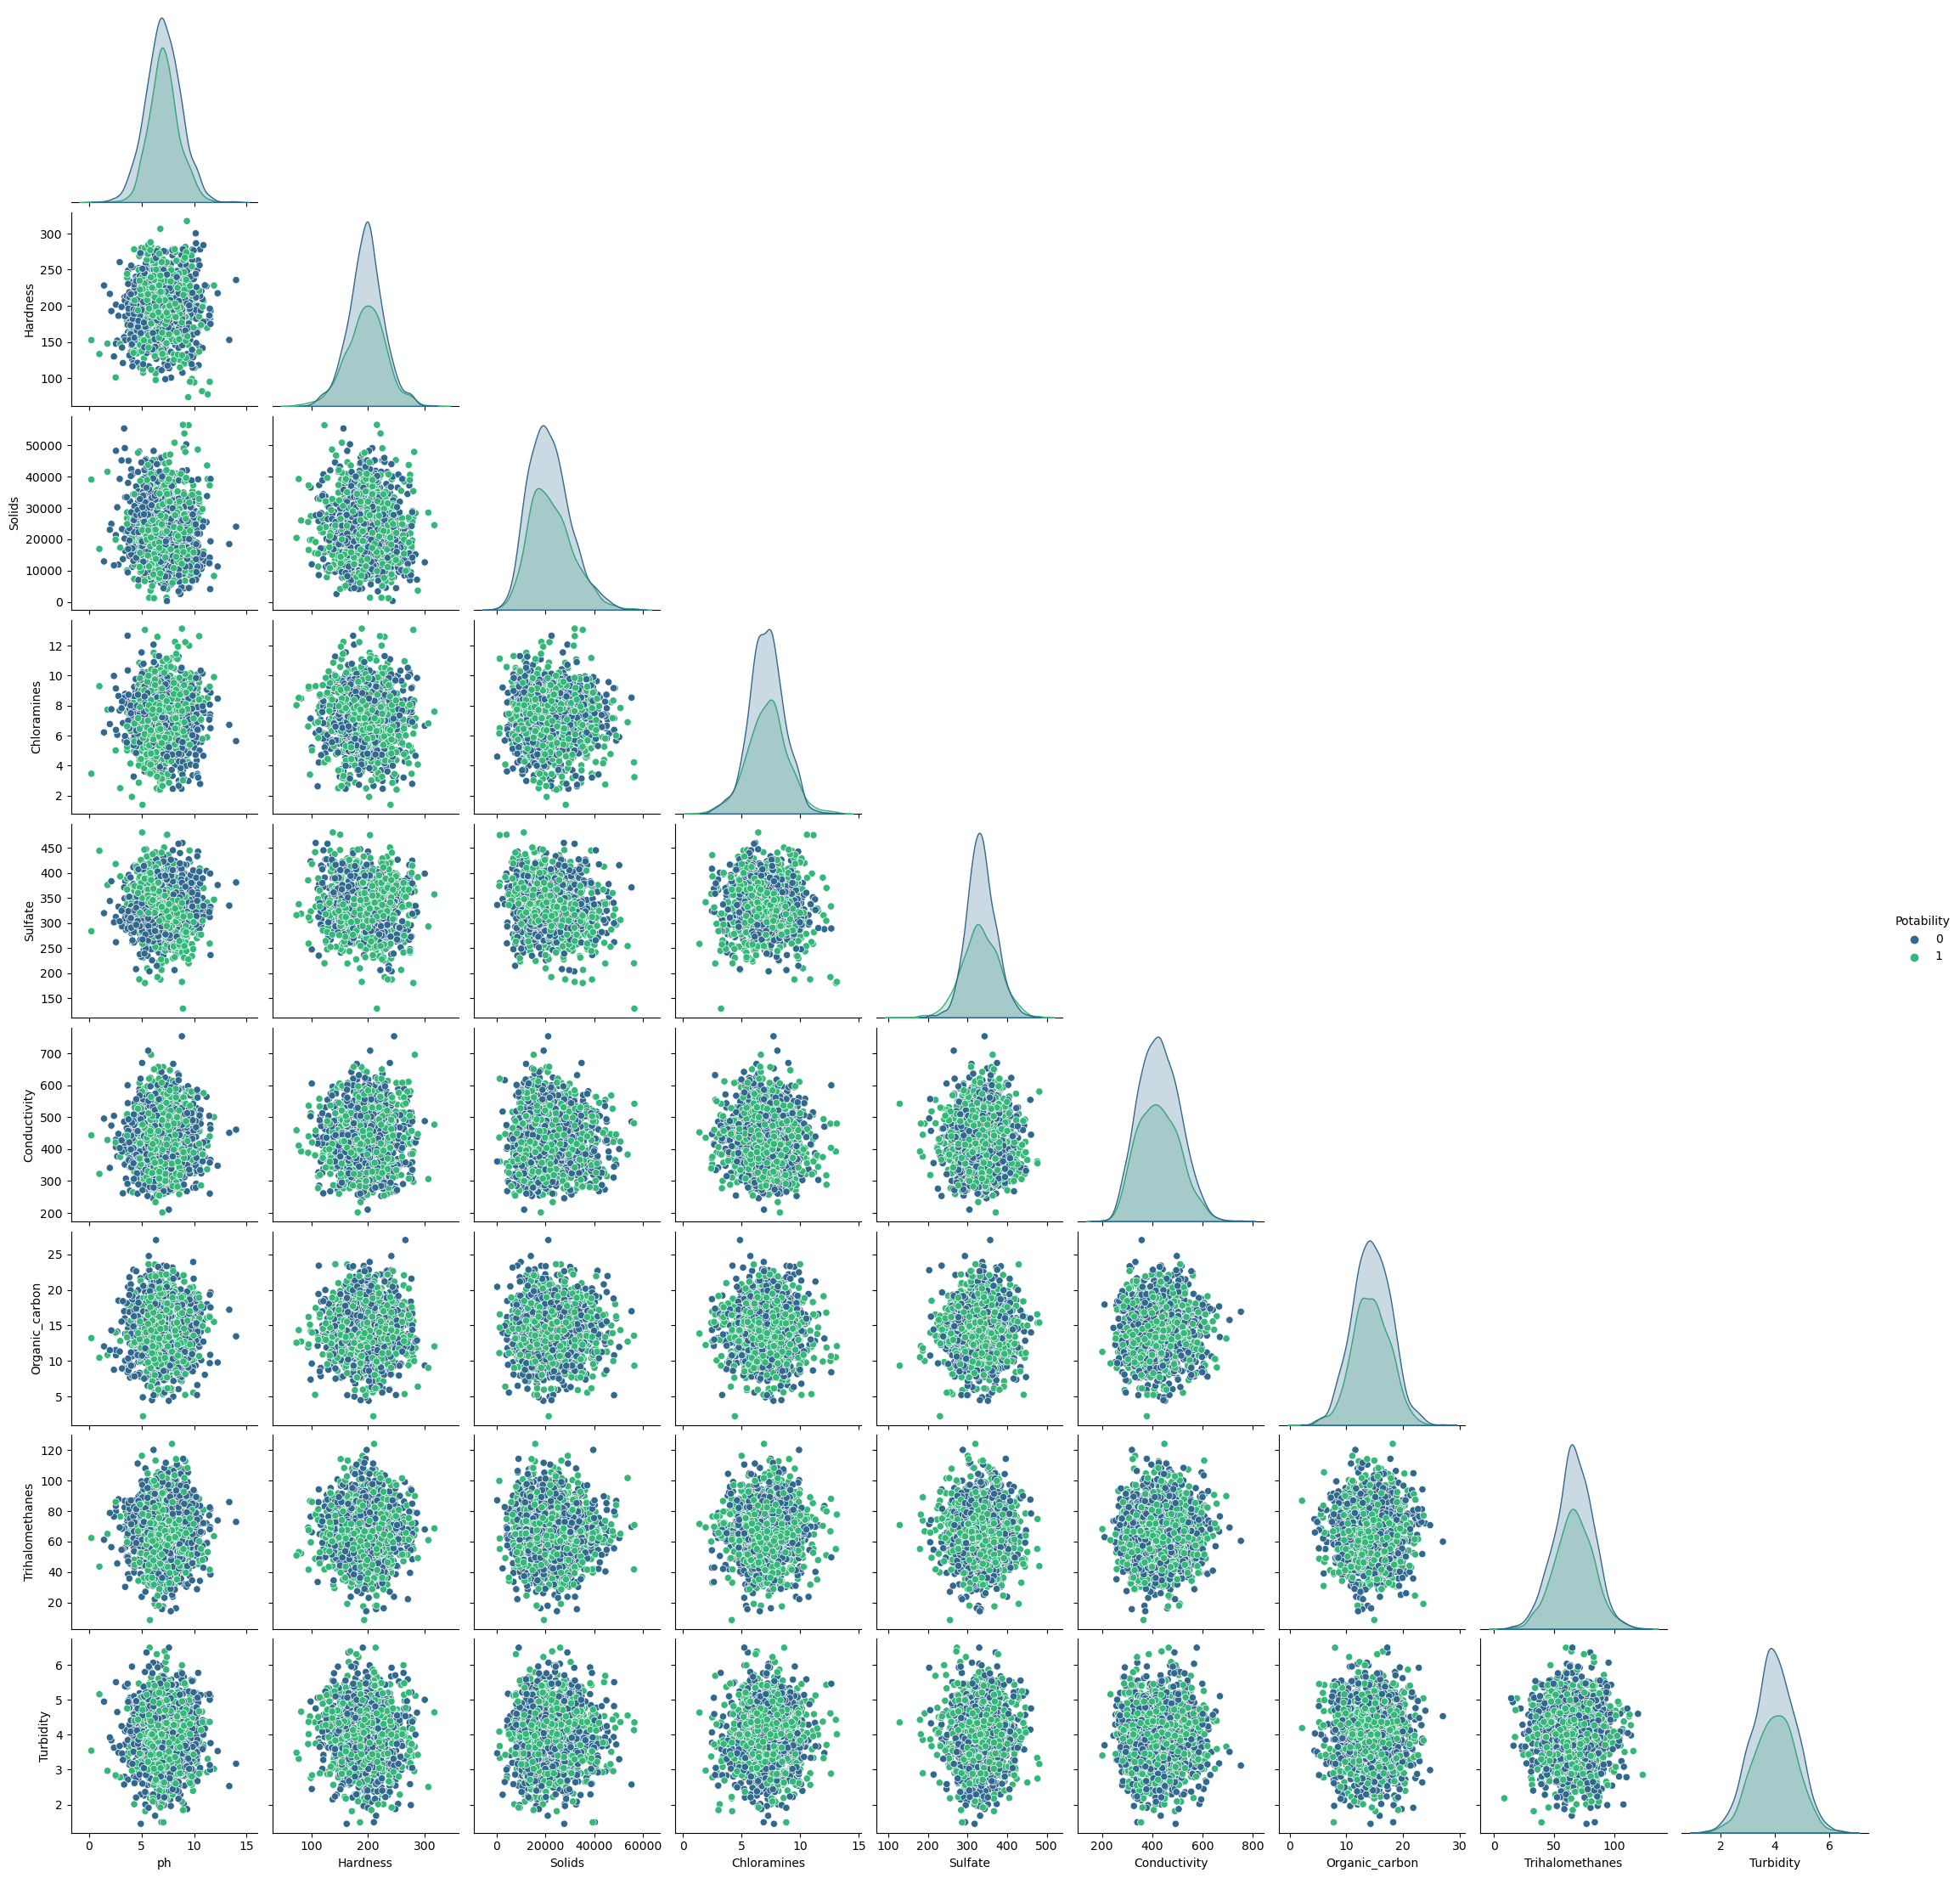

In [17]:
correlations = df_nettoye.corr()

print("Corrélations entre les variables :")
print(correlations)

sns.pairplot(df_nettoye, hue='Potability', palette='viridis',corner=True)
plt.show()

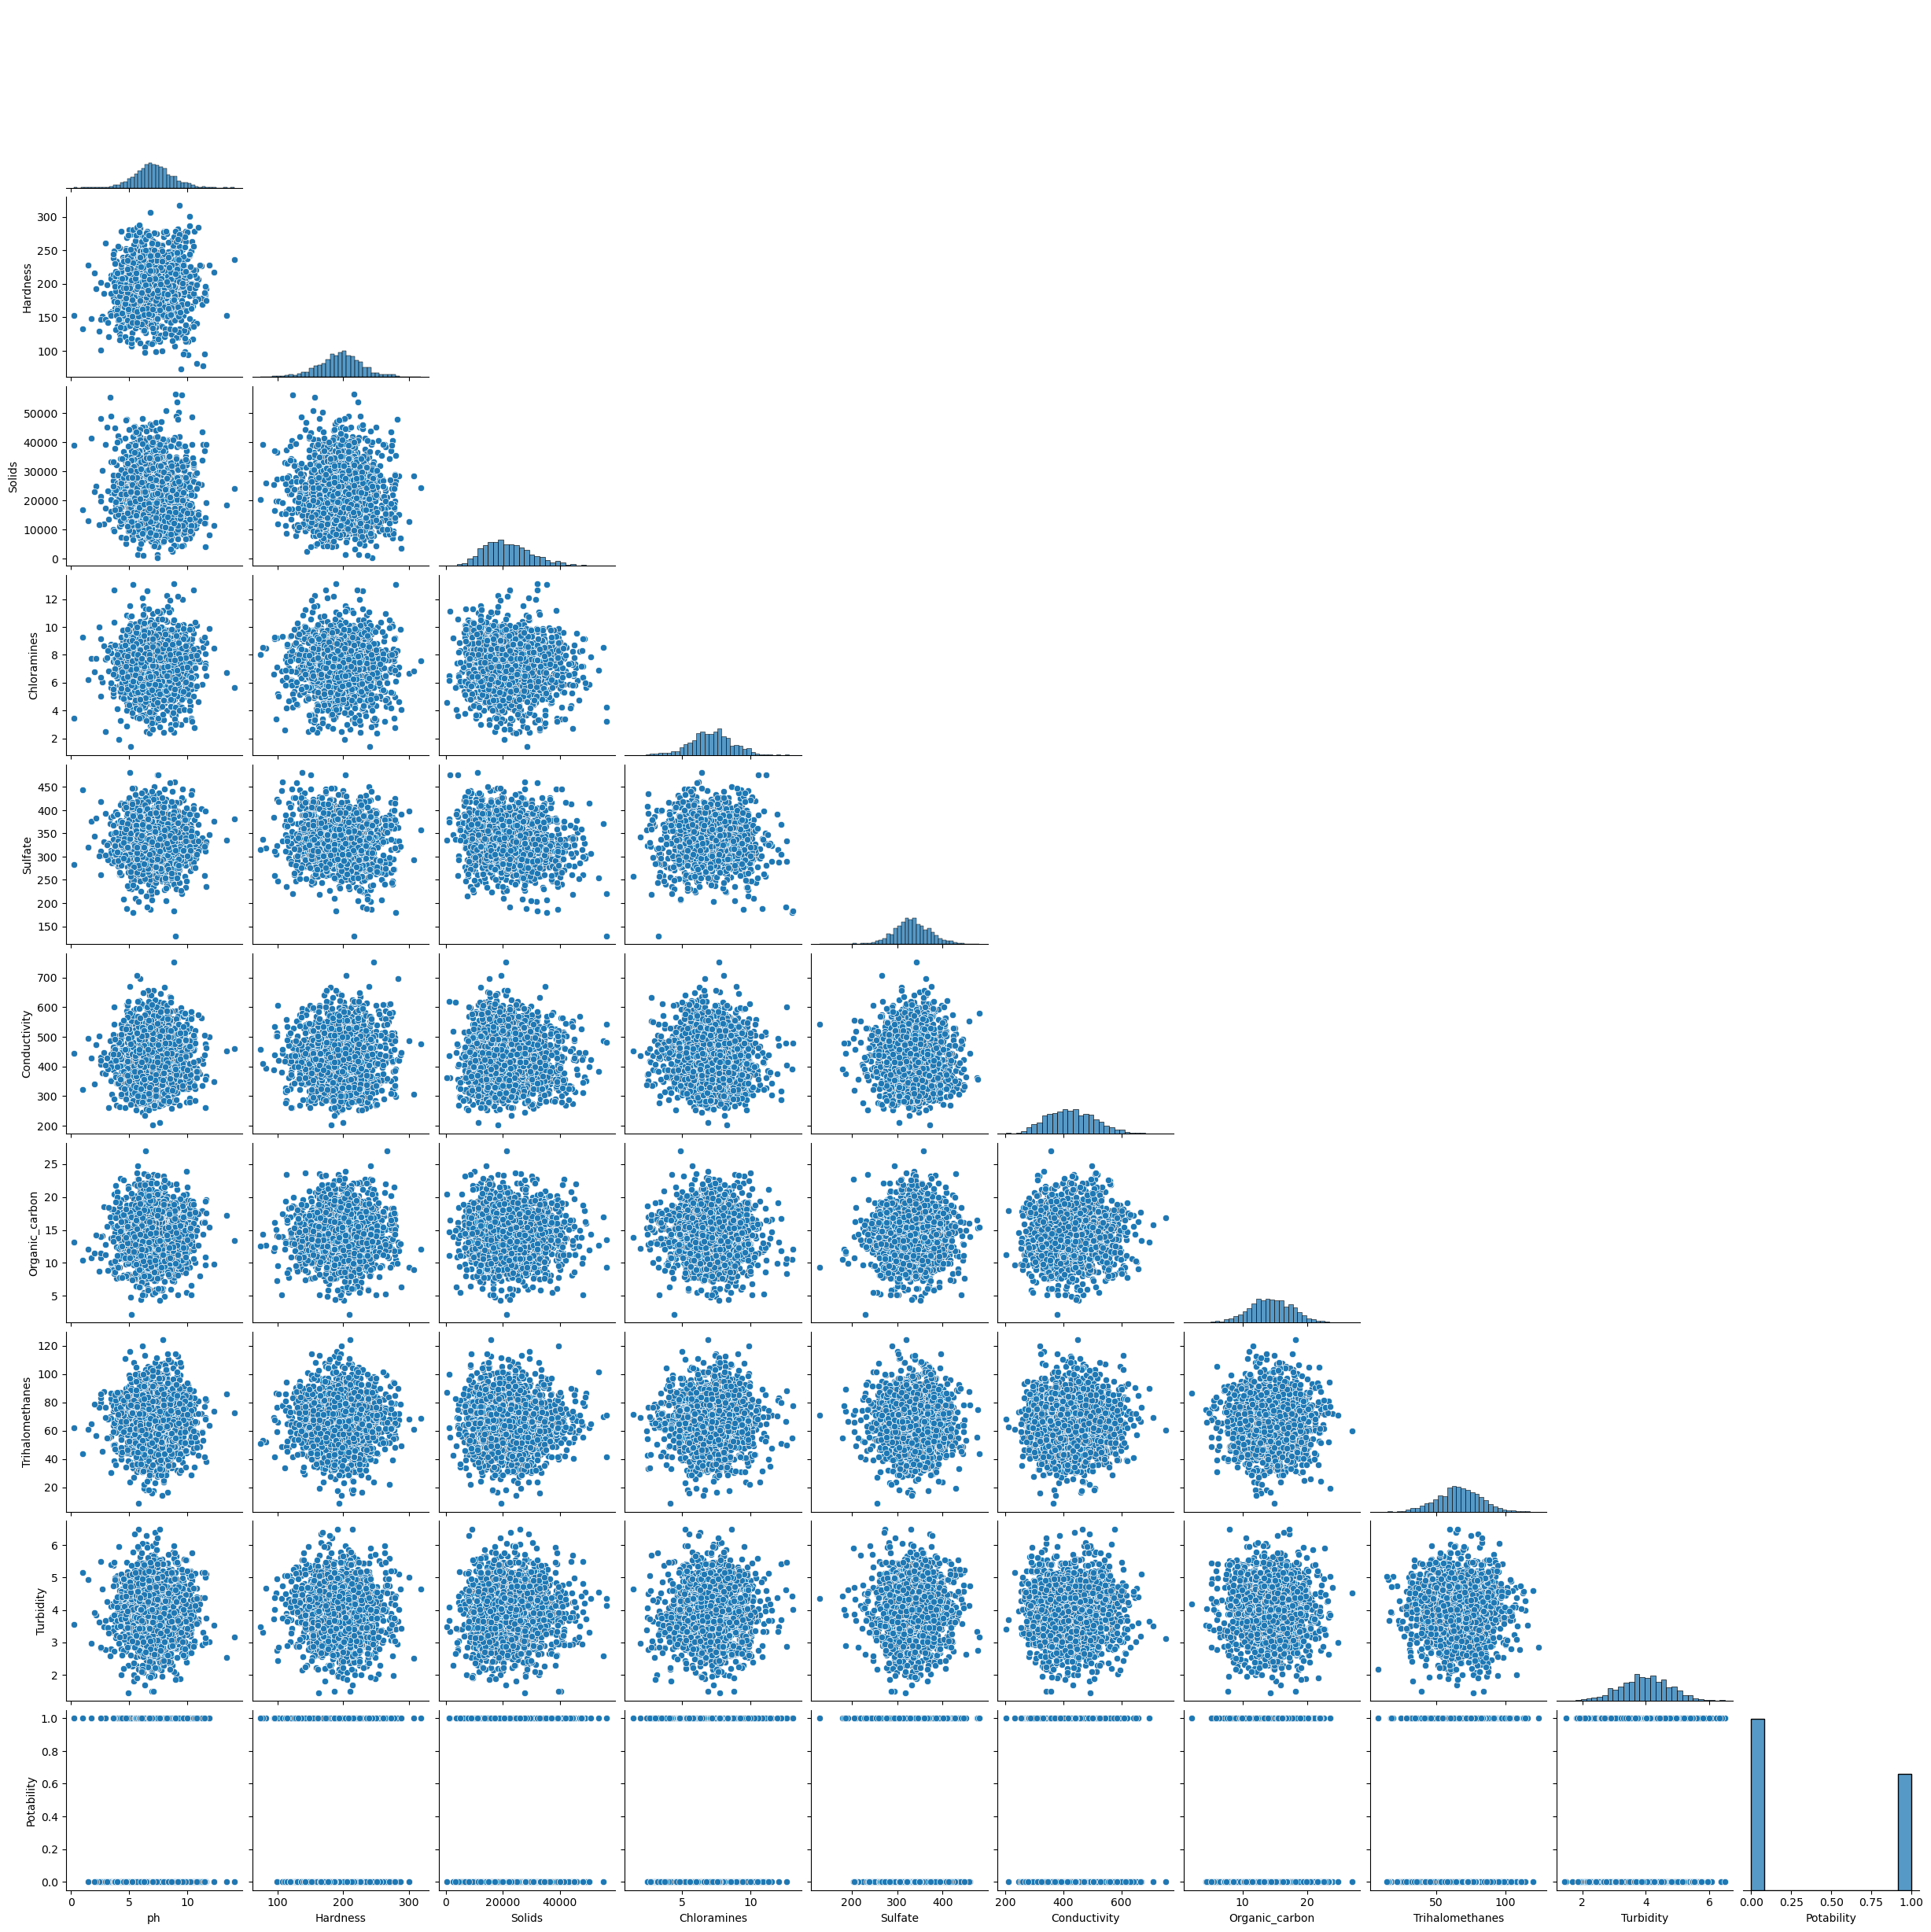

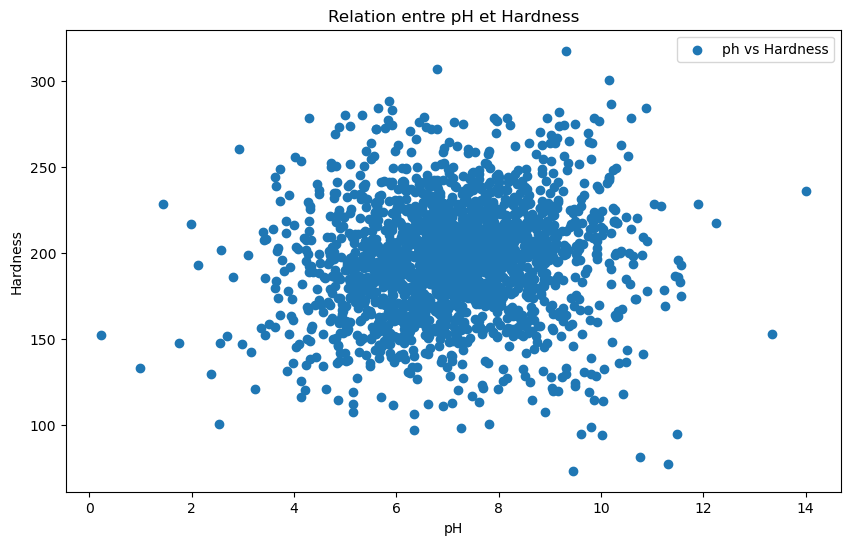

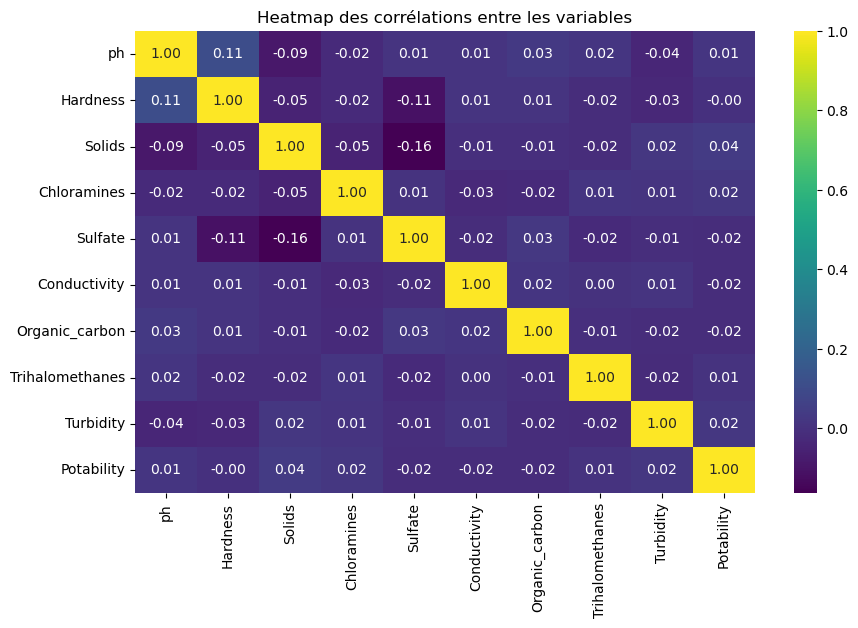

In [18]:
sns.pairplot(df_nettoye,corner=True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_nettoye['ph'], df_nettoye['Hardness'], label='ph vs Hardness')
plt.xlabel('pH')
plt.ylabel('Hardness')
plt.title('Relation entre pH et Hardness')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_nettoye.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap des corrélations entre les variables')
plt.show()

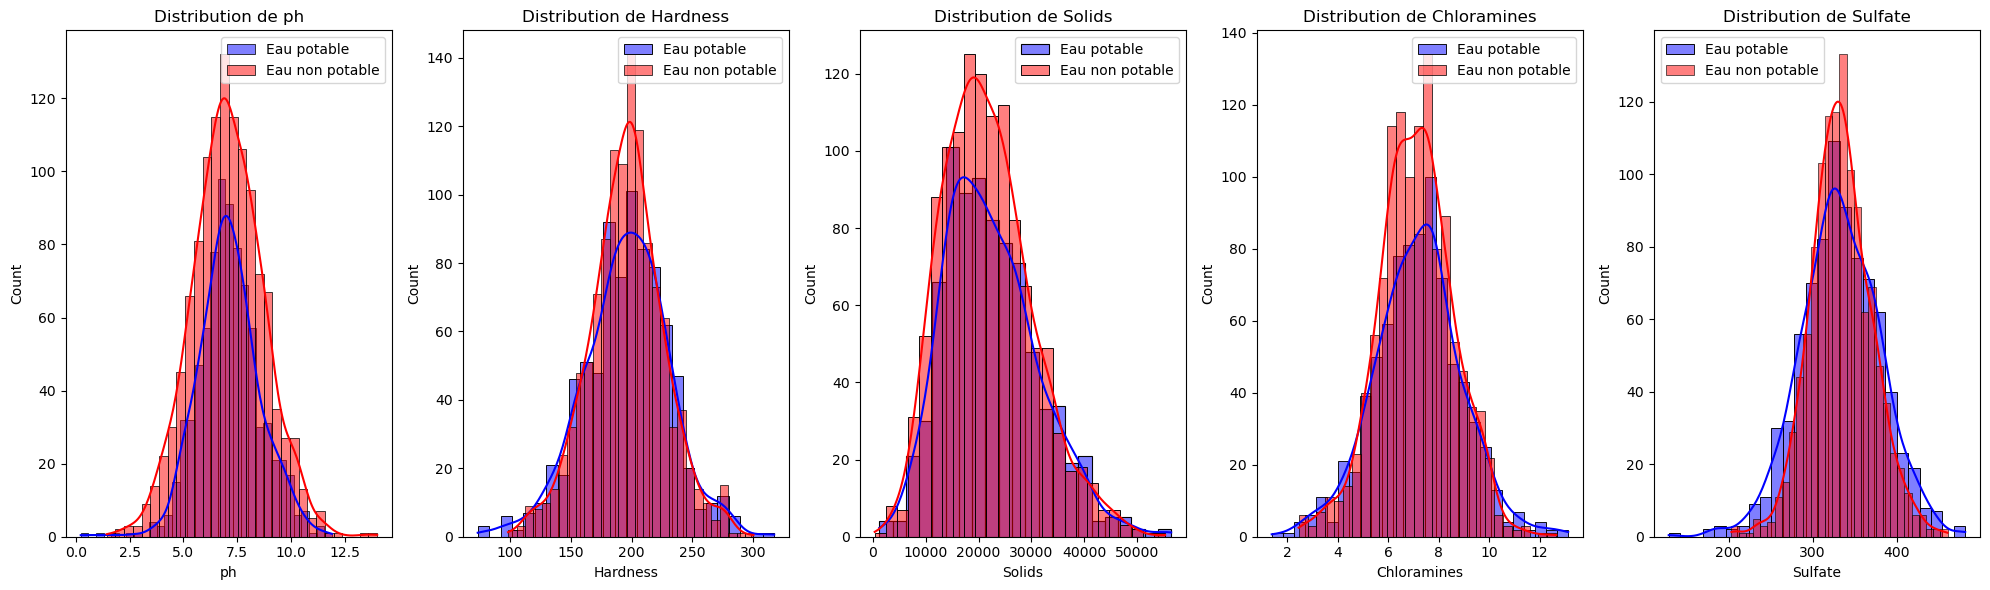

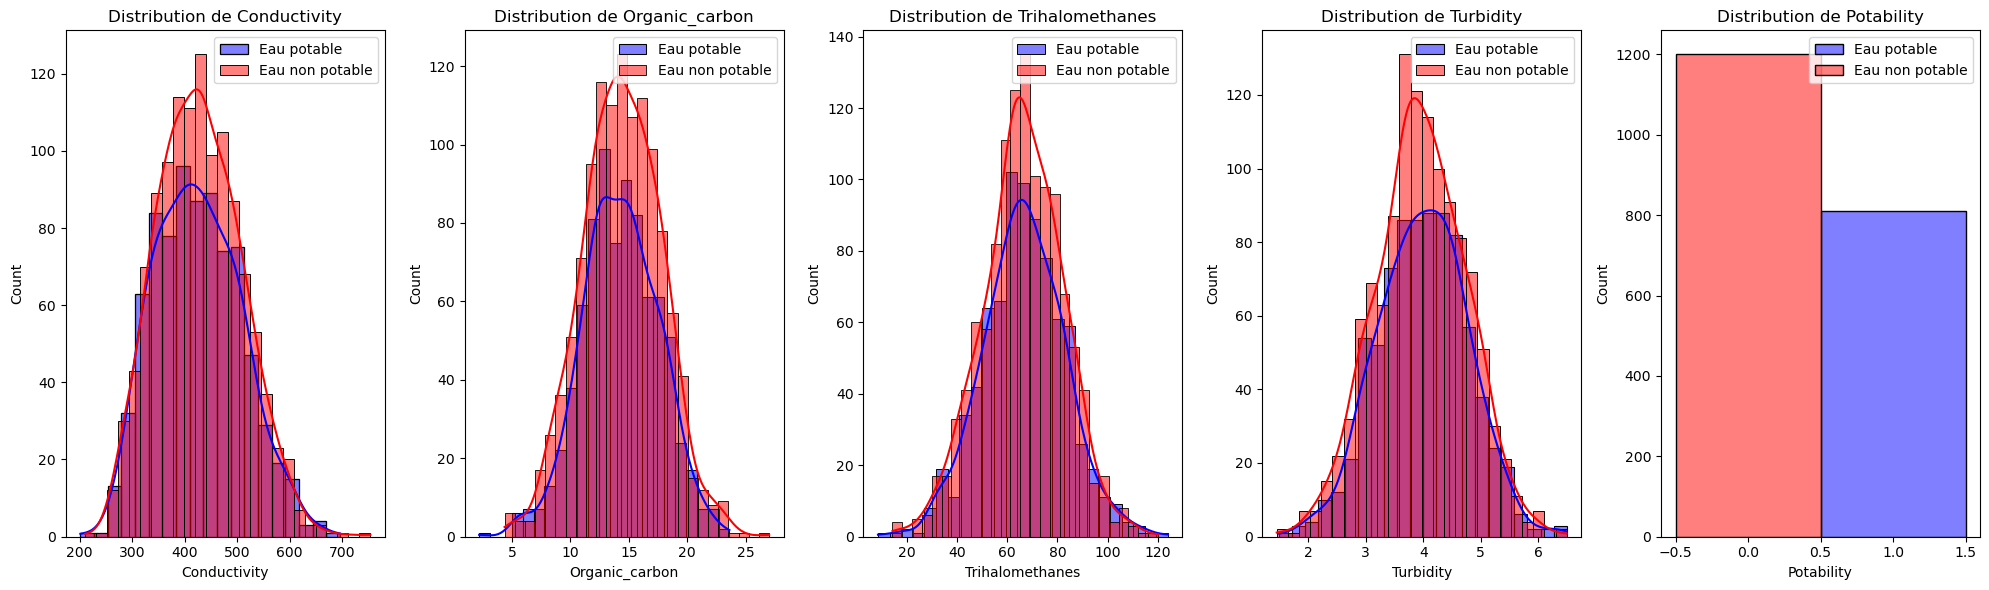

In [19]:
eau_potable = df_nettoye[df_nettoye['Potability'] == 1]
non_eau_potable = df_nettoye[df_nettoye['Potability'] == 0]

colonnes = df_nettoye.columns.tolist()
max_graphiques_par_ligne = 5
compteur = 0

for colonne in colonnes:
    if compteur == 0:
        fig, axes = plt.subplots(1, max_graphiques_par_ligne, figsize=(20, 6))

    sns.histplot(eau_potable[colonne], color='blue', label='Eau potable', kde=True, ax=axes[compteur])
    sns.histplot(non_eau_potable[colonne], color='red', label='Eau non potable', kde=True, ax=axes[compteur])
    axes[compteur].set_title(f'Distribution de {colonne}')
    axes[compteur].legend()
    compteur += 1

    if compteur == max_graphiques_par_ligne or colonne == colonnes[-1]:
        plt.tight_layout()
        plt.show()
        compteur = 0

In [20]:
df_nettoye.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [21]:
df_nettoye.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2011.000000  2011.000000   2011.000000  2011.000000  2011.000000   
mean      7.085990   195.968072  21917.441374     7.134338   333.224672   
std       1.573337    32.635085   8642.239815     1.584820    41.205172   
min       0.227499    73.492234    320.942611     1.390871   129.000000   
25%       6.089723   176.744938  15615.665390     6.138895   307.632511   
50%       7.027297   197.191839  20933.512750     7.143907   332.232177   
75%       8.052969   216.441070  27182.587067     8.109726   359.330555   
max      14.000000   317.338124  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2011.000000     2011.000000      2011.000000  2011.000000  2011.000000  
mean     426.526409       14.357709        66.400859     3.969729     0.403282  
std       80.712572        3.324959        16.077109     0.780346     0.490678  
min      201.619737        2.200000         8.577013     1.450000     0.000000  
25%      366.680307       12.124105        55.952664     3.442915     0.000000  
50%      423.455906       14.322019        66.542198     3.968177     0.000000  
75%      482.373169       16.683049        77.291925     4.514175     1.000000  
max      753.342620       27.006707       124.000000     6.494749     1.000000

In [22]:
X = df_nettoye.drop('Potability',axis=1).values
y = df_nettoye['Potability'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Exemples de X_train :", X_train[:3])
print("Exemples de X_test :", X_test[:3])
print("Exemples de y_train :", y_train[:3])
print("Exemples de y_test :", y_test[:3])

Exemples de X_train : [[ 0.49798633  0.15889559 -0.15947901 -0.93641641 -0.84492178 -1.51359148
   0.27142569  0.33999047 -0.84810807]
 [-0.79385001 -1.54262003 -0.25658663 -1.41416934 -0.32338247 -0.14321995
   0.35097163  1.14181552  0.3943825 ]
 [-0.5110947  -1.9547112   1.04851724 -0.09010066 -2.01024954 -0.55685741
   0.84857541  0.31749929 -0.46635318]]
Exemples de X_test : [[-0.97963475 -0.20694764 -1.1928923   1.00665101 -0.07676808 -1.17329804
   1.09095855  0.00622358  0.50921871]
 [ 0.59171247  0.17061892 -1.15286948  0.05110075 -0.81063467 -0.06732827
  -2.12754969  1.53820205 -0.95099026]
 [-0.83605321 -0.46410871 -1.01905639 -0.63605867  1.02667399 -0.25366706
   0.42545418 -1.9171092   0.13181672]]
Exemples de y_train : [0 0 1]
Exemples de y_test : [0 0 1]


# Models Spot Checking

Nous decidons de tester plussieurs modèls d'algorithmes de modélisation pour une apporoche plus pertinante dans notre choix final. Plutôt que de se concentrer uniquement sur un seul algorithme, le spot checking implique de tester plusieurs algorithmes sur les mêmes données pour voir lequel fonctionne le mieux.

In [23]:
models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("SVC", SVC()),
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ("DTC", DecisionTreeClassifier()),
    ("GNB", GaussianNB()),
    ("SGDC", SGDClassifier()),
    ("Perc", Perceptron()),
    ("NC", NearestCentroid()),
    ("Ridge", RidgeClassifier()),
    ("NuSVC", NuSVC()),
    ("BNB", BernoulliNB()),
    ('RF', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('XGB', GradientBoostingClassifier()),
    ('PAC', PassiveAggressiveClassifier())
]

results = []

In [24]:
warnings.filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [25]:
finalResults

[('RF', 0.7209740990990992),
 ('SVC', 0.7199457740909898),
 ('XGB', 0.6723296613627091),
 ('NuSVC', 0.6531649450497619),
 ('KNN', 0.6515686828716789),
 ('Ridge', 0.6245146977260122),
 ('DTC', 0.6225127529475356),
 ('GNB', 0.6121277563082519),
 ('ADA', 0.5829225004929994),
 ('SGDC', 0.5610192837465565),
 ('LR', 0.5408333333333333),
 ('Perc', 0.48702345317588236),
 ('PAC', 0.45827957467633584),
 ('NC', 0.4569805194805195),
 ('BNB', 0.2905629139072848)]

Accuracy: 0.4685430463576159
Precision: 0.37218045112781956
Recall: 0.391304347826087
F1-score: 0.3815028901734104
AUC-ROC: 0.4688580340754254


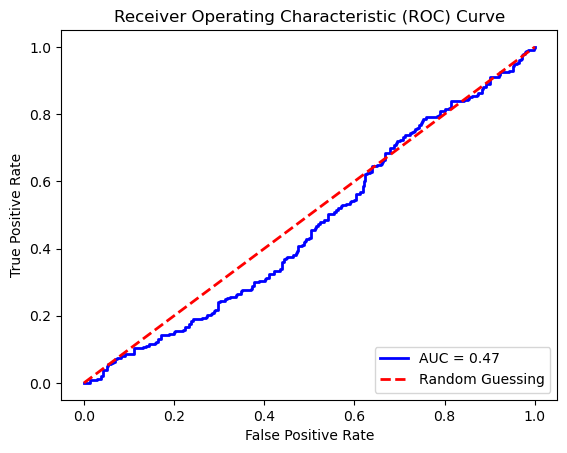

In [26]:
y_scores = model.decision_function(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

from scipy.special import expit
y_prob = expit(y_scores) 

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {roc_auc}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Nous venons de tester differents métrics d'évaluation pour voir la pérformance de notre modèle. Les résultats obtenus suggèrent que le modèle a une performance relativement faible pour prédire la potabilité de l'eau, avec une précision, un rappel et un F1-score relativement bas, ainsi qu'un AUC-ROC proche de 0.5 indiquant une performance de prédiction faible. 

Les données sont prêtes pour la construction de nos modèls 

In [27]:
X_train,X_test,y_train,y_test = train_test_split(df_nettoye,y,test_size=0.3, random_state=0)
X_test.shape

(604, 10)

# Model de Développement

Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy')
print('-----------------------------------------------')
print("test data accuracy:",accuracy_score(y_test, y_test_hat))
print("train data accuracy:",accuracy_score(y_train, y_train_hat))

Test performance
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       367
           1       0.92      0.92      0.92       237

    accuracy                           0.94       604
   macro avg       0.94      0.94      0.94       604
weighted avg       0.94      0.94      0.94       604

Roc_auc
-----------------------------------------------
0.9353924510514031

Confusion matrix
-----------------------------------------------
[[349  18]
 [ 19 218]]

accuracy
-----------------------------------------------
test data accuracy: 0.9387417218543046
train data accuracy: 0.9381663113006397


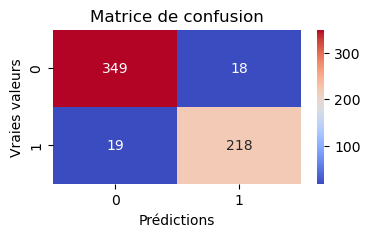

In [29]:
conf_matrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

- L'exactitude globale du modèle de régression logistique est de 93%. 
- Le modèle semble équilibré dans ses prédictions pour les deux classes, avec des scores de précision et de rappel élevés pour les classes 0 et 1.
- Cela est confirmé par un faible score ROC AUC de 0.93, ce qui indique une très bonne capacité du modèle à distinguer entre les classes 0 et 1. 
- La matrice de confusion montre que le modèle prédit correctement la classe 0, ainsi que la classe 1. 
- En outre, le modèle de régression logistique montre une performance robuste et équilibrée, avec une très bonne capacité de discrimination et une exactitude élevée, tout en évitant le surajustement.
- Cependant nous allons voir dans nos prochaines test que ce modèle est juste mais pas correct à cause de nos données qui ne sont pas correctes pour la potabilité de l'eau.

Random Forest

In [30]:
rf = RandomForestClassifier(n_jobs=-1, random_state=123)
rf.fit(X_train, y_train)
y_train_hat =rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy')
print('-----------------------------------------------')
print("test data accuracy:",accuracy_score(y_test, y_test_hat))
print("train data accuracy:",accuracy_score(y_train, y_train_hat))

Test performance
-----------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       237

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

Roc_auc
-----------------------------------------------
1.0

Confusion matrix
-----------------------------------------------
[[367   0]
 [  0 237]]

accuracy
-----------------------------------------------
test data accuracy: 1.0
train data accuracy: 1.0


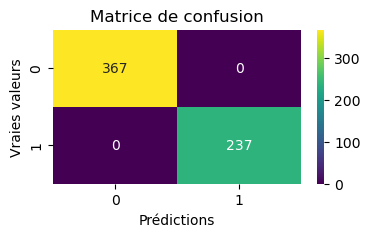

In [31]:
conf_matrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

Pour le test de Random Forest, voici un résumé des résultats :

- Précision : 70% pour la classe 0, 72% pour la classe 1
- Rappel : 88% pour la classe 0, 45% pour la classe 1
- F1-score : 78% pour la classe 0, 56% pour la classe 1
- Exactitude globale : 70%
- ROC AUC : 66%

Matrice de confusion :
- Vrais négatifs (TN) : 311
- Faux positifs (FP) : 44
- Faux négatifs (FN) : 136
- Vrais positifs (TP) : 113

- Le modèle Random Forest présente une précision et un rappel décents pour la classe 0, mais un rappel plus faible pour la classe 1. 
- L'exactitude globale est raisonnable, avec une capacité de discrimination modérée mesurée par le ROC AUC. 
- La matrice de confusion montre une répartition des prédictions du modèle entre les vrais positifs et les faux positifs pour chaque classe.

In [32]:
# test model SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Test performance')
print('-----------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc')
print('-----------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-----------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy')
print('-----------------------------------------------')
print("test data accuracy:",accuracy_score(y_test, y_test_hat))
print("train data accuracy:",accuracy_score(y_train, y_train_hat))

Test performance
-----------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       355
           1       0.42      0.40      0.41       249

    accuracy                           0.52       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.52      0.52      0.52       604

Roc_auc
-----------------------------------------------
0.504428983539793

Confusion matrix
-----------------------------------------------
[[217 138]
 [150  99]]

accuracy
-----------------------------------------------
test data accuracy: 0.5231788079470199
train data accuracy: 0.509594882729211


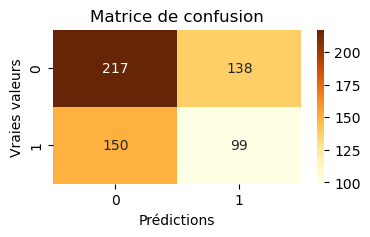

In [33]:
conf_matrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrBr')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

- Ces résultats indiquent une performance raisonnable du modèle, avec une précision relativement élevée pour la classe 0 mais une précision et un rappel plus faibles pour la classe 1. 
- L'exactitude globale et le score ROC AUC confirment une capacité de discrimination modérée du modèle. 
- La matrice de confusion montre une répartition des prédictions du modèle entre les vrais positifs et les faux positifs pour chaque classe.

- Pour prédire la potabilité de l'eau, on pourrait privilégier la précision et la fiabilité du modèle, car il s'agit d'une tâche critique où des erreurs de prédiction pourraient avoir des conséquences importantes sur la santé publique. 
- Sur cette base, le modèle Random Forest semble être un bon choix parmi les trois options.

JUSTIFICATIONS:

Random Forest : 

- Est un modèle robuste et peut gérer efficacement une grande variété de caractéristiques et de relations non linéaires entre ces caractéristiques et la potabilité de l'eau. 
- Il est également moins susceptible de surajuster par rapport à un réseau de neurones, ce qui peut être crucial compte tenu des enjeux liés à la santé publique.

Régression logistique : 

- Bien que la régression logistique soit simple et interprétable, elle peut ne pas être aussi flexible que le Random Forest pour capturer des modèles plus complexes dans vos données. 
- Cela pourrait entraîner une précision inférieure, ce qui n'est pas souhaitable dans notre cas.

Réseau de neurones : 

- Les réseaux de neurones sont très puissants pour modéliser des relations complexes, mais ils nécessitent souvent beaucoup de données pour s'entraîner correctement et peuvent être plus sensibles au surajustement. 
- De plus, leur interprétabilité est généralement inférieure à celle des autres modèles, ce qui peut être un inconvénient si nous devons expliquer les prédictions à des parties prenantes non techniques.

Nous allons tester les deux modèls XGB(GradientBoostingClassifier) et random forest en même temps pour observer les résultats

In [34]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [35]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=10)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters     Score
0            XGB  {'n_estimators': 1000, 'max_features': 'sqrt',...  0.679519
1  Random Forest  {'n_estimators': 50, 'max_features': 'log2', '...  0.667338

Gradient Boosting (XGBoost) :

Les meilleurs paramètres trouvés sont : {'n_estimators': 1000, 'max_features': 'log2', ...}
- Précision obtenue : 0.669562

Random Forest :

Les meilleurs paramètres trouvés sont : {'n_estimators': 100, 'max_features': 'sqrt', ...}
- Précision obtenue : 0.686486

Il semble que le modèle Random Forest ait obtenu une meilleure précision que le modèle XGBoost sur cet ensemble de données, avec une précision de 0.686486 comparée à 0.669562. 
- Cela signifie que le modèle Random Forest a tendance à mieux généraliser et à mieux prédire la potabilité de l'eau sur de nouvelles données.
- Cependant pour obtenir de meilleurs résultats et une bonne prédiction, nous devons maximiser la précision, le rappel, le F1-score et le score ROC AUC tout en maintenant un équilibre dans la matrice de confusion et en minimisant l'écart entre les performances sur les données d'entraînement et de test. 
- Le fait que nos données ne sont pas reajuster biese notre résultat. Une labelisation des données est succeptible de nous fournier les résultats attendus.